In [1]:
!pip install rasterio -q
!pip install spectral -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import rasterio as rio
from spectral import imshow
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
# armazenando caminhos
files_list = list(glob.glob("/content/drive/MyDrive/PDISAR/ALOS/*.tif"))

In [ ]:
print(files_list)

['/content/drive/MyDrive/PDISAR/ALOS/ALOS_VV.tif', '/content/drive/MyDrive/PDISAR/ALOS/ALOS_VH.tif', '/content/drive/MyDrive/PDISAR/ALOS/ALOS_HV.tif', '/content/drive/MyDrive/PDISAR/ALOS/ALOS_HH.tif']


In [ ]:
#src1 = rio.open(files_list[0])

In [ ]:
# Leitura das imagens e conversao para array
with rio.open(files_list[0]) as src1:
  VV = src1.read(1)
with rio.open(files_list[1]) as src1:
  VH = src1.read(1)
with rio.open(files_list[2]) as src1:
  HV = src1.read(1)
with rio.open(files_list[3]) as src1:
  HH = src1.read(1)

In [ ]:
type(VV)

numpy.ndarray

In [ ]:
VV.shape

(1767, 1909)

In [ ]:
# Empilhando os dados
stack = np.dstack([VV, VH, HV, HH])

In [ ]:
stack.shape

(1767, 1909, 4)

ImageView object:
  Display bands       :  (0, 1, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.010177710093557835, 0.7235181331634521]
    G: [0.0016453894786536694, 0.14448703825473785]
    B: [0.01291745901107788, 1.3298540115356445]

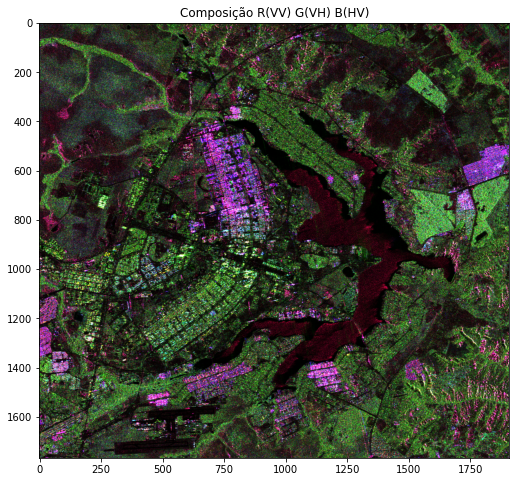

In [ ]:
# Visualizando composicao colorida
imshow(stack, bands=(0,1,3), figsize=(12,8), title="Composição R(VV) G(VH) B(HV)",
       stretch=(0.02, 0.98))

In [ ]:
# Funcao de expansao do histograma
def expansao(img, percent_ini=2, percent_fim=98):
  s = np.zeros_like(img)
  x,y = 0, 255
  w = np.percentile(img, percent_ini)
  z = np.percentile(img, percent_fim)
  fun = x + (img - w) * (y-x) / (z - w)
  fun[fun<x] = x
  fun[fun>y] = y
  s = fun
  return s

In [ ]:
stack.shape[2]

4

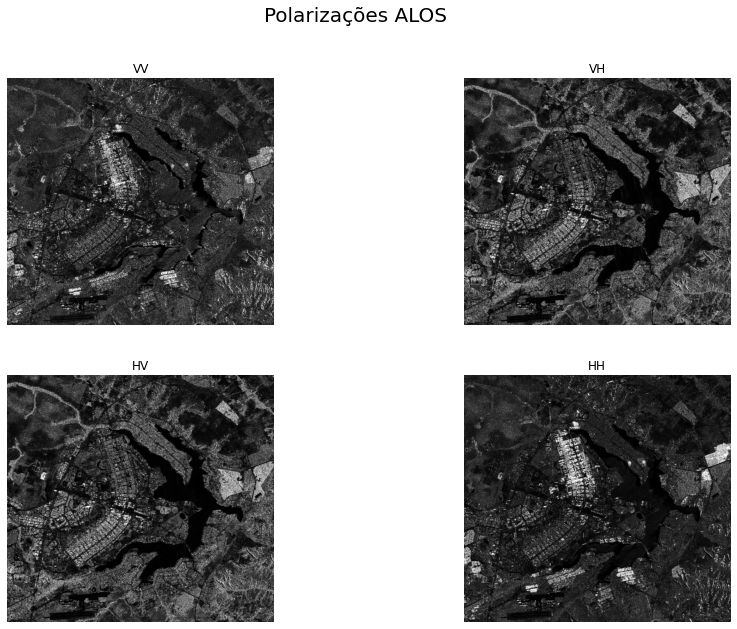

In [ ]:
# Visualizando polarizaçoes separadas
fig, axes = plt.subplots(2,2, figsize=(15,10), sharex= "all", sharey= "all")
fig.suptitle("Polarizações ALOS", fontsize=20)
axes = axes.ravel()

pol = ["VV", "VH", "HV", "HH"]
for i in range(stack.shape[2]):
  axes[i].imshow(expansao(stack[:,:,i]), cmap="gray")
  axes[i].set_title(pol[i], fontsize=12)
  axes[i].axis("off")

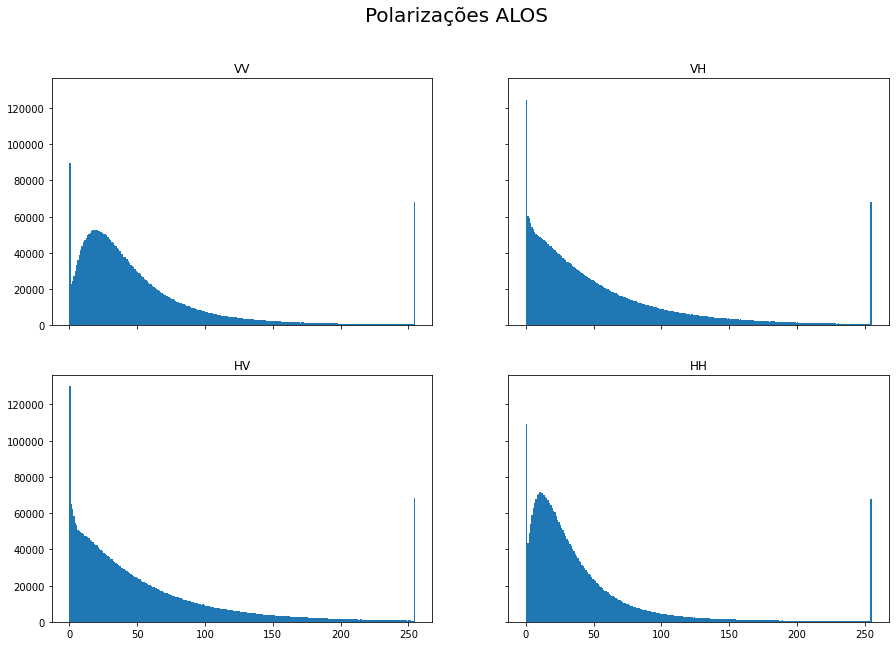

In [ ]:
# Visualizando histogramas separados
fig, axes = plt.subplots(2,2, figsize=(15,10), sharex= "all", sharey= "all")
fig.suptitle("Polarizações ALOS", fontsize=20)
axes = axes.ravel()

pol = ["VV", "VH", "HV", "HH"]
for i in range(stack.shape[2]):
  axes[i].hist(expansao(stack[:,:,i].flatten()), bins=255)
  axes[i].set_title(pol[i], fontsize=12)

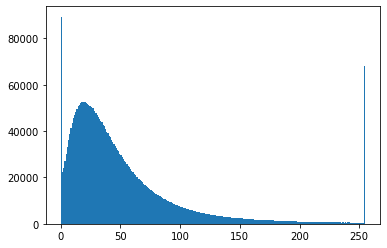

In [ ]:
plt.hist(expansao(stack[:,:,0].flatten()), bins=255)
plt.show()